# Unsupervised Learning Analysis

This notebook presents an analysis using unsupervised learning techniques on a food dataset.
The analysis includes data preprocessing, clustering using KMeans, visualization with PCA,
hierarchical clustering, and density-based clustering using DBSCAN.

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

## Load the Dataset

We begin by loading the dataset and examining the first few rows to understand its structure.


In [9]:
# Load the dataset
food_data = pd.read_csv('food.csv', index_col=0)
print(food_data.head())

                RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  Nuts  \
Albania            10.1        1.4   0.5   8.9   0.2     42.3     0.6   5.5   
Austria             8.9       14.0   4.3  19.9   2.1     28.0     3.6   1.3   
Belgium            13.5        9.3   4.1  17.5   4.5     26.6     5.7   2.1   
Bulgaria            7.8        6.0   1.6   8.3   1.2     56.7     1.1   3.7   
Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   1.1   

                Fr.Veg  
Albania            1.7  
Austria            4.3  
Belgium            4.0  
Bulgaria           4.2  
Czechoslovakia     4.0  


## Data Preprocessing

The data is scaled using z-score normalization to ensure that the clustering algorithm does not get biased by the scale of the data.

In [16]:
# Data Preprocessing
scaler = StandardScaler()
scaled_food_data = scaler.fit_transform(food_data)
scaled_food_data_df = pd.DataFrame(scaled_food_data, index=food_data.index, columns=food_data.columns)

# Verify the mean and standard deviation of the scaled features
mean_of_scaled_data = scaled_food_data_df.mean()
std_of_scaled_data = scaled_food_data_df.std()

print("Means after scaling (should be close to 0):\n", mean_of_scaled_data)
print("\nStandard Deviations after scaling (should be close to 1):\n", std_of_scaled_data)


Means after scaling (should be close to 0):
 RedMeat     -3.730349e-16
WhiteMeat    3.996803e-17
Eggs         4.618528e-16
Milk        -2.753353e-16
Fish         5.329071e-17
Cereals     -3.907985e-16
Starch       1.554312e-16
Nuts        -8.881784e-18
Fr.Veg      -1.776357e-17
dtype: float64

Standard Deviations after scaling (should be close to 1):
 RedMeat      1.020621
WhiteMeat    1.020621
Eggs         1.020621
Milk         1.020621
Fish         1.020621
Cereals      1.020621
Starch       1.020621
Nuts         1.020621
Fr.Veg       1.020621
dtype: float64


## Clustering using KMeans

We will apply the KMeans algorithm with different numbers of clusters and determine the optimal number using the silhouette score.


In [11]:
# Clustering using KMeans
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    clusters = kmeans.fit_predict(scaled_food_data_df)
    score = silhouette_score(scaled_food_data_df, clusters)
    silhouette_scores.append(score)
    print(f"K = {k}")
    print(kmeans.cluster_centers_[:5])

# Print Silhouette scores for each k
for k, score in zip(k_values, silhouette_scores):
    print(f"k = {k}, Silhouette Score = {score}")

optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (k) based on the Silhouette coefficient is: {optimal_k}")

# Final KMeans clustering
final_kmeans = KMeans(n_clusters=optimal_k, random_state=123)
final_clusters = final_kmeans.fit_predict(scaled_food_data_df)


K = 2
[[-0.69157862 -0.77525692 -0.88216272 -0.89372703 -0.18117527  0.93387453
  -0.5408884   1.07835101  0.33607608]
 [ 0.46105241  0.51683795  0.58810848  0.59581802  0.12078352 -0.62258302
   0.36059227 -0.71890067 -0.22405072]]
K = 3
[[-0.62220731 -0.66888703 -0.91184211 -0.74505981 -0.70010446  1.26378091
  -0.91407642  1.06164634 -0.0628021 ]
 [ 0.46105241  0.51683795  0.58810848  0.59581802  0.12078352 -0.62258302
   0.36059227 -0.71890067 -0.22405072]
 [-0.96906387 -1.20073649 -0.76344517 -1.48839594  1.89454145 -0.385751
   0.95186365  1.14516971  1.93158879]]
K = 4
[[-0.80643515 -0.53765145 -1.18961073 -0.9234126  -0.97006761  1.46798653
  -0.77614779  0.90530771 -0.54843392]
 [ 0.46105241  0.51683795  0.58810848  0.59581802  0.12078352 -0.62258302
   0.36059227 -0.71890067 -0.22405072]
 [-0.96906387 -1.20073649 -0.76344517 -1.48839594  1.89454145 -0.385751
   0.95186365  1.14516971  1.93158879]
 [-0.06952378 -1.06259377 -0.07853623 -0.21000143  0.10978502  0.65116406
  -1.3

## Visualization with PCA

After clustering, it's helpful to visualize the data points in a lower-dimensional space. Here, we use PCA to reduce our data to two dimensions and then plot the clusters.

/var/folders/k2/nzxv_btj2m14q09kwq26g2n80000gn/T/ipykernel_6986/378083227.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pca_df.PC1[i], pca_df.PC2[i], txt, fontsize=9)


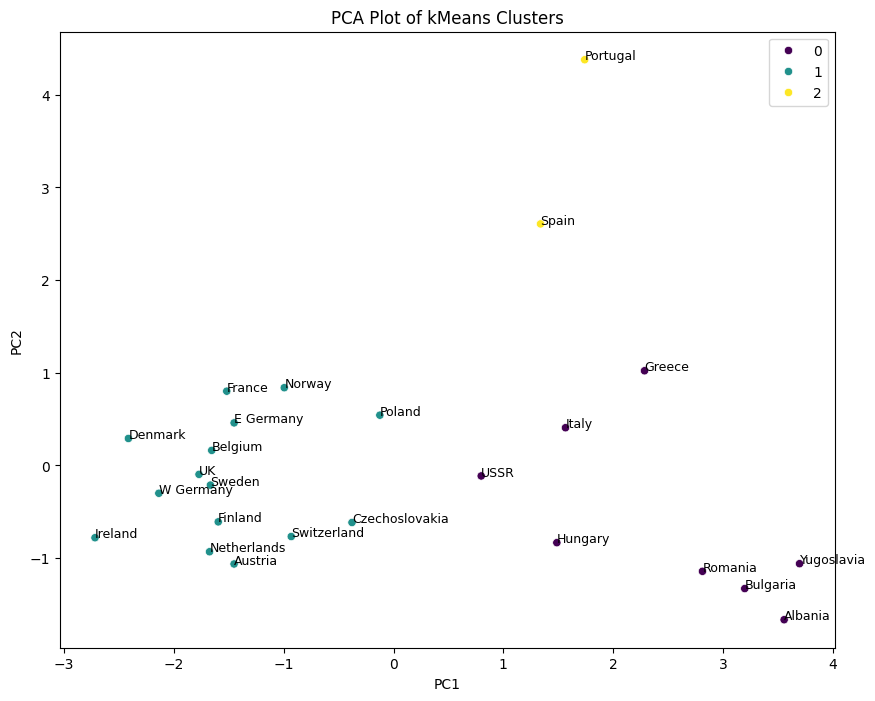

In [12]:
# PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_food_data_df)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=food_data.index)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue=final_clusters, data=pca_df, palette='viridis')
plt.title('PCA Plot of kMeans Clusters')
for i, txt in enumerate(food_data.index):
    plt.text(pca_df.PC1[i], pca_df.PC2[i], txt, fontsize=9)
plt.show()

## Hierarchical Clustering

In addition to KMeans, we will perform hierarchical clustering to see how it organizes the data into a dendrogram.


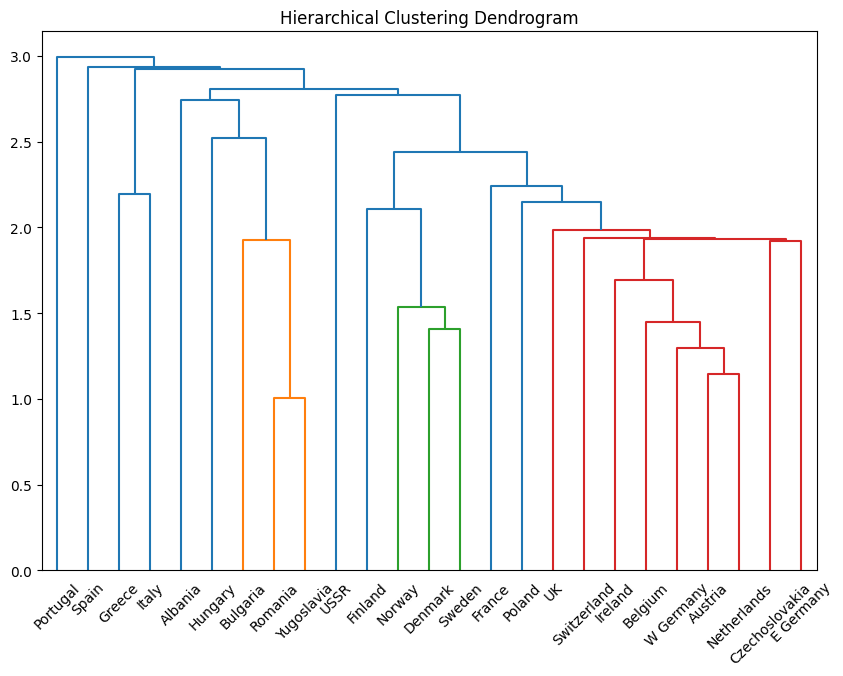

In [13]:
# Hierarchical Clustering
linked = linkage(scaled_food_data_df, 'single')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=food_data.index.tolist())
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

## Heatmap with Hierarchical Clustering
We will use seaborn's clustermap to visualize a heatmap with hierarchical clustering on our scaled data. This will provide insights into how the samples and features cluster together.


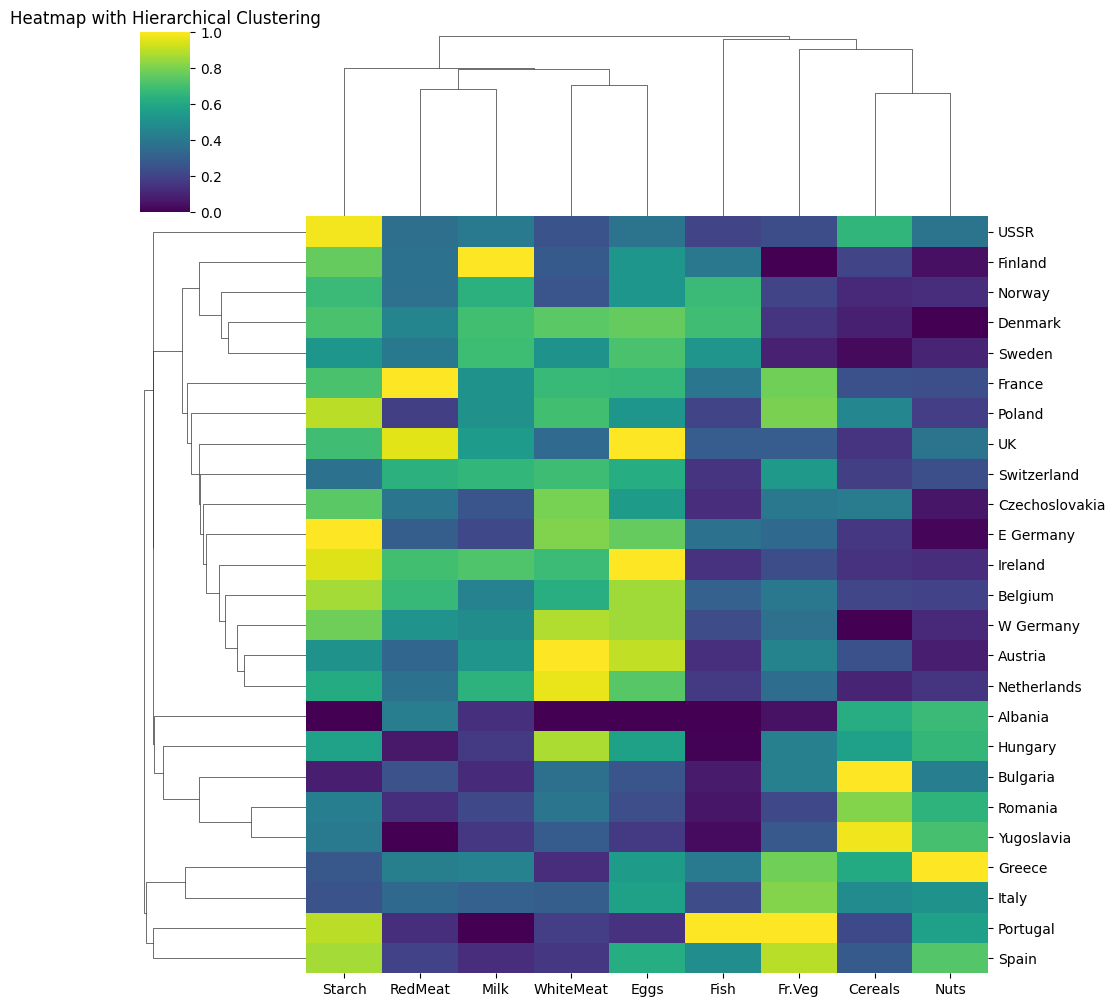

In [14]:
# Heatmap with clustering
sns.clustermap(scaled_food_data_df, standard_scale=1, method='single', cmap='viridis')
plt.title('Heatmap with Hierarchical Clustering')
plt.show()

## Density-Based Clustering using DBSCAN
Now let's perform density-based clustering using the DBSCAN algorithm from scikit-learn. DBSCAN is particularly useful for datasets with complex structures and noise. We will print the cluster assignments and visualize the results.

[-1  0  0  1  0  2  0 -1 -1 -1 -1  0 -1  0  2 -1 -1  1 -1  2  0  0 -1  0
  1]


/var/folders/k2/nzxv_btj2m14q09kwq26g2n80000gn/T/ipykernel_6986/705516671.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pca_df.PC1[i], pca_df.PC2[i], txt, fontsize=9)


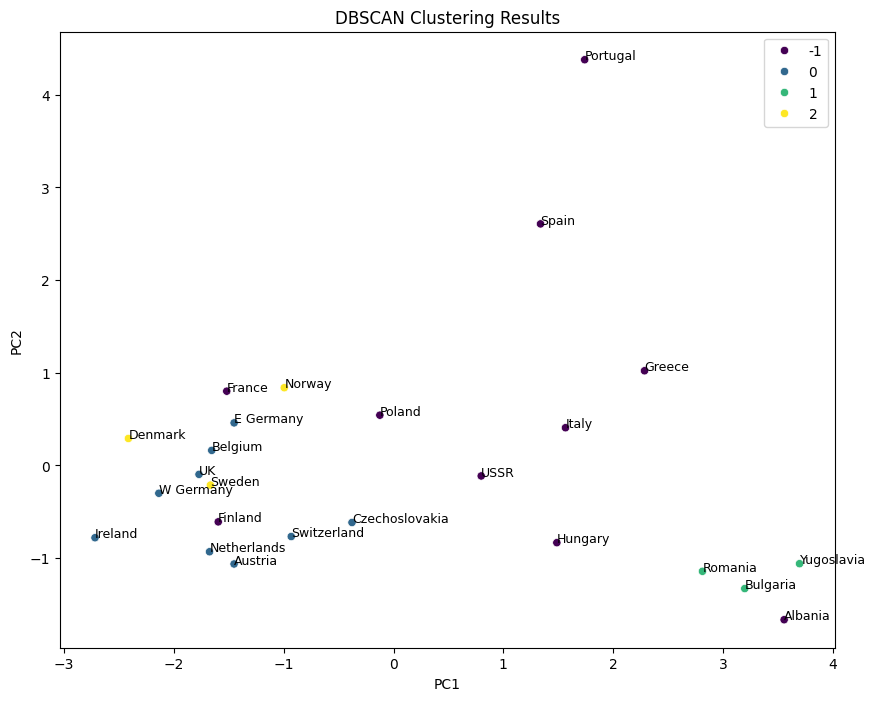

In [15]:
# Density-Based Clustering using DBSCAN
dbscan = DBSCAN(eps=2, min_samples=3)
dbscan_clusters = dbscan.fit_predict(scaled_food_data_df)
print(dbscan_clusters)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue=dbscan_clusters, data=pca_df, palette='viridis')
plt.title('DBSCAN Clustering Results')
for i, txt in enumerate(food_data.index):
    plt.text(pca_df.PC1[i], pca_df.PC2[i], txt, fontsize=9)
plt.show()
